In [17]:
import healpy as hp
import numpy as np
import vaex as vx
import pylab as plt
%matplotlib inline

In [2]:
tgas = vx.open("/Users/users/breddels/tgas/tgas.hdf5")
gaia = vx.open("/Users/users/breddels/gaia/cdn.gea.esac.esa.int/Gaia/gaia_source/gaia-dr1-unshuffled-b.hdf5")

In [3]:
tgas._stat(selection=[False, "parallax < 0"])

array([ 2057050.,    30840.])

In [9]:
%%time
c=gaia.healpix_count(binby=gaia.col.phot_g_mean_mag, limits=[[10, 23]])
print("{:,}".format(c.sum()))
print c.shape

1,142,188,884.0
(786432, 128)
CPU times: user 36.7 s, sys: 1min 35s, total: 2min 11s
Wall time: 50.8 s


Sigma is 18.000000 arcmin (0.005236 rad) 
-> fwhm is 42.386761 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
CPU times: user 5.1 s, sys: 360 ms, total: 5.46 s
Wall time: 495 ms


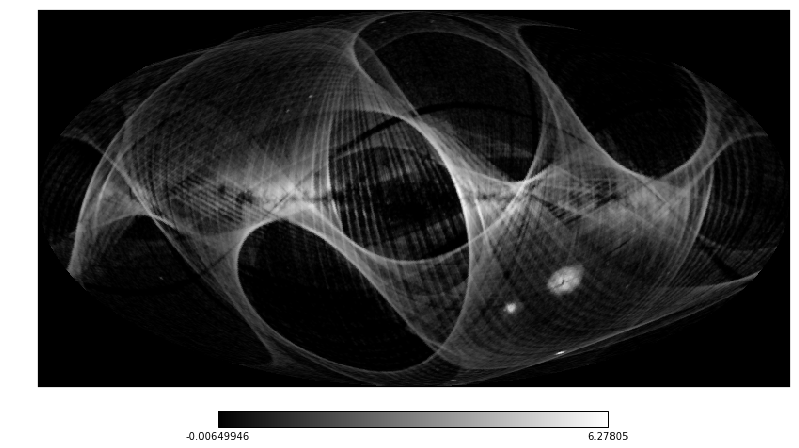

In [46]:
%%time
gaia.healpix_plot(f="log1p", smooth=0.3,
                  rotation=(-0,0,0),
                  grid=c[:,-20:-1].sum(axis=1), figsize=(14,8), healpix_level=8, colormap="binary_r", what="mean(matched_observations)")
#gaia.healpix_plot(f="log1p", grid=c[:,-43], figsize=(14,8), healpix_level=8, colormap="binary_r", what="mean(matched_observations)")


In [15]:
hp.mollzoom(c[:,-30], nest=True)

In [32]:
#%%time
#gaia.healpix_plot(f="log1p", healpix_level=10, interactive=True)#, figsize=(10,8), )


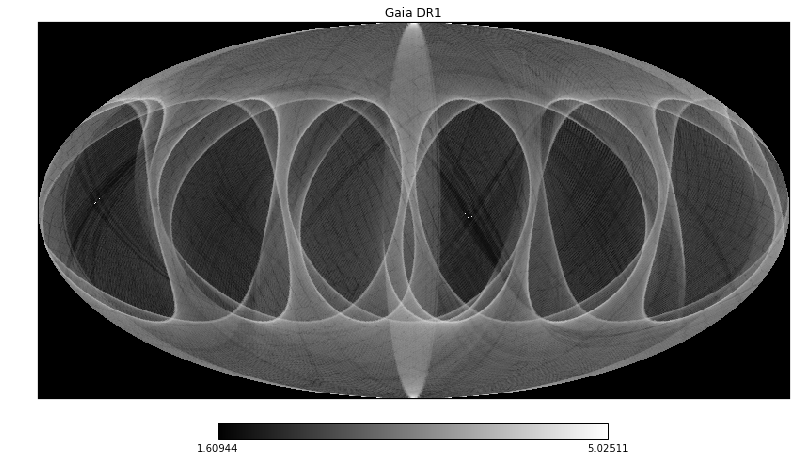

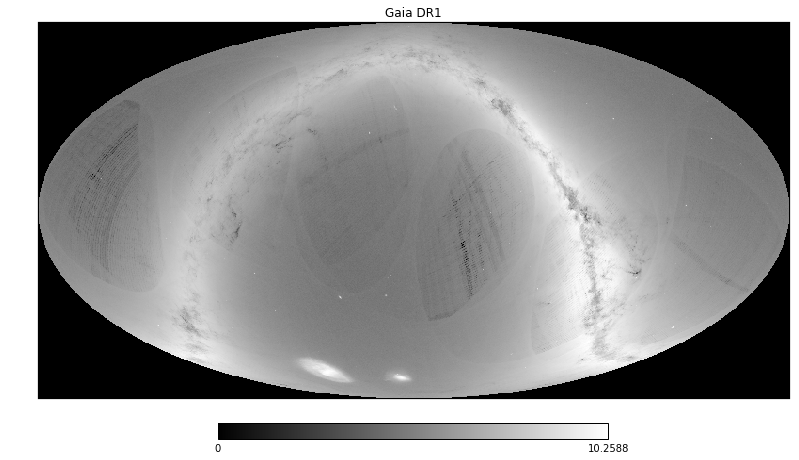

CPU times: user 2min 33s, sys: 35.9 s, total: 3min 9s
Wall time: 20 s


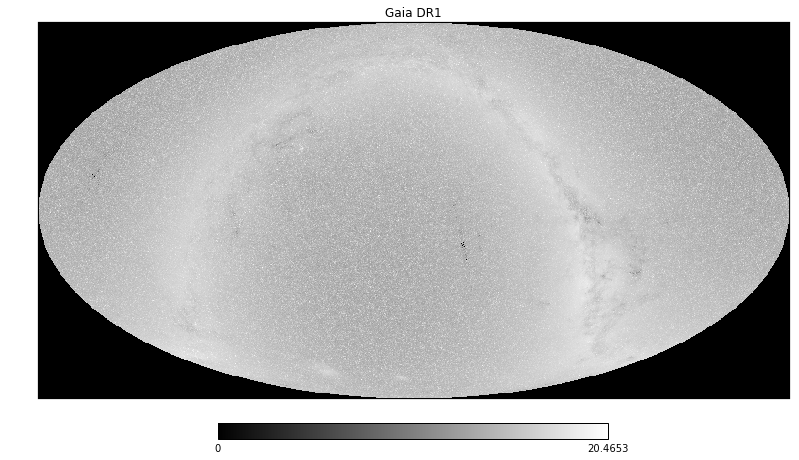

In [42]:
%%time
gaia.col.phot_g_mean_flux
gaia.healpix_plot(f="log1p", figsize=(14,8), healpix_level=8, colormap="binary_r", what="mean(matched_observations)", healpix_output="ecliptic")
plt.show()
gaia.healpix_plot(f="log1p", figsize=(14,8), healpix_level=8, colormap="binary_r", what="count(*)", healpix_output="equatorial")
plt.show()
gaia.healpix_plot(f="log1p", figsize=(14,8), healpix_level=8, colormap="binary_r", what="sum(phot_g_mean_flux)", healpix_output="equatorial")


In [38]:
del gaia.variables["healpix"]
gaia.write_meta()

KeyError: 'healpix'

In [5]:
%%time
level = 7
NSIDE=2**level
nmax = hp.nside2npix(NSIDE)
#gaia.add_variable("healpix_scaling", 34359738368*4**(12-level))
c=gaia.count(binby="source_id/healpix_scaling", limits=[0., nmax], shape=nmax)#, selection="phot_g_mean_mag < 26")

NameError: name 'source_id' is not defined

In [ ]:
print c.sum(), nmax
print ds.max("source_id/(34359738368*4*4)")

In [ ]:
c.sum()

In [8]:
gaia.add_virtual_column("healpix", "source_id/34359738368")
#c=gaia.count(binby="healpix", limits=[0., nmax], shape=nmax)#, selection="phot_g_mean_mag < 26")

49152 221.702503369
CPU times: user 23.7 s, sys: 2.53 s, total: 26.2 s
Wall time: 2.35 s


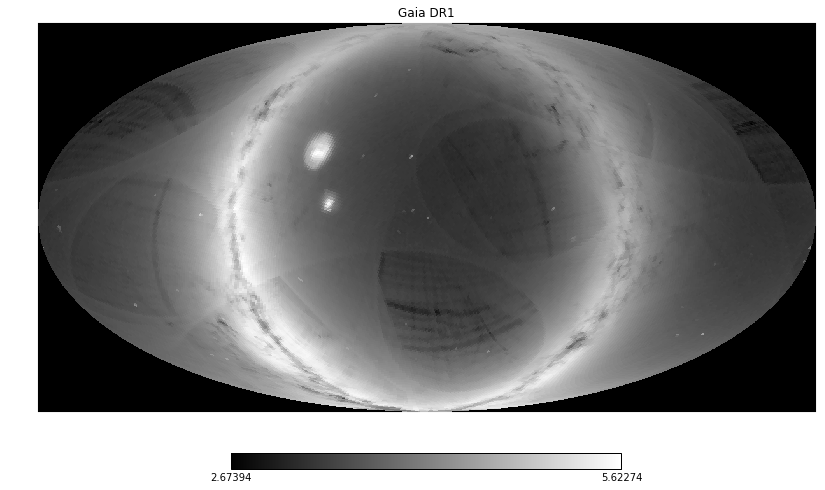

In [86]:
%%time
def plot_healpix(healpix="healpix", level=12, reduce_level=4):
    plot_level = level-reduce_level
    NSIDE=2**plot_level
    nmax = hp.nside2npix(NSIDE)
    print nmax, np.sqrt(nmax)
    scaling = 4**reduce_level
    c=gaia.count(binby="source_id/34359738368/%s" % scaling, limits=[0., nmax], shape=nmax) #, selection="phot_g_mean_mag < 20")
    #c=gaia.sum(ds.col.phot_g_mean_flux, binby="source_id/34359738368/%s" % scaling, limits=[0., nmax], shape=nmax)
    c = hp.reorder(c, inp="NEST", out="RING")
    #c = hp.smoothing(c, sigma=np.radians(10))
    cf = np.log10(c)
    hp.mollview(cf, rot=(-50,-90,90), nest=False,title="Gaia DR1", coord=['C','G'], cmap="binary_r", hold=True, xsize=2000)#, min=6-1, max=8.7-1)
f=plt.figure(figsize=(14,14))
plot_healpix(reduce_level=6)
#plt.savefig("/Users/users/breddels/Dropbox/gaia/gaia-dr1-flux.pdf")

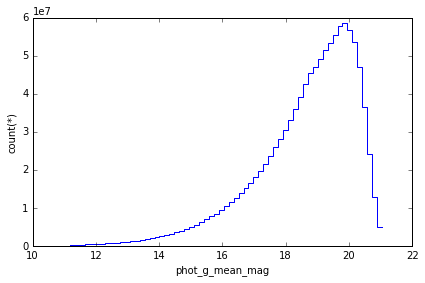

In [21]:
gaia.plot1d(ds.col.phot_g_mean_mag)

In [36]:
"{:,}".format(gaia.count(selection=True))

'312,281,269.0'

(<matplotlib.image.AxesImage at 0x7f352876b610>, None)

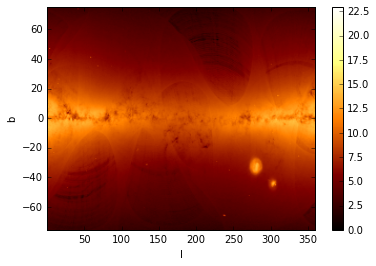

In [33]:
gaia.select("phot_g_mean_mag < 20")
#gaia.plot("l", "b", selection=True)
gaia("l", "b").selected().plot(f=np.log1p)

(<matplotlib.image.AxesImage at 0x7f3528461910>, None)

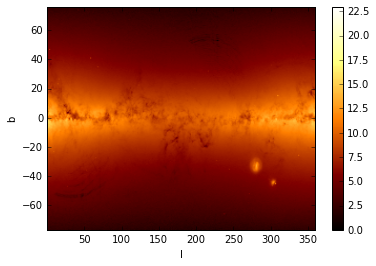

In [35]:
gaia.select("phot_g_mean_mag < 18")
#gaia.plot("l", "b", selection=True)
gaia("l", "b").selected().plot(f=np.log1p)

0.0 180.0 -180.0 180.0
The interval between parallels is 30 deg -0.00'.
The interval between meridians is 30 deg -0.00'.


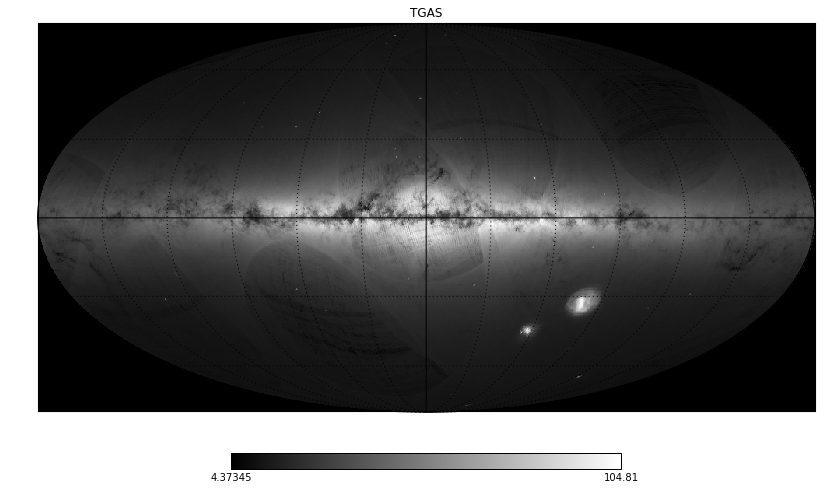

In [133]:
cf = c**0.4#np.log(c+1000)
f=plt.figure(figsize=(14,14))
hp.mollview(cf, nest=True,title="TGAS", coord=['C','G'], cmap="binary_r", hold=True, xsize=1000)
hp.graticule()
plt.savefig("/Users/users/breddels/Dropbox/gaia/gaia-dr1.pdf")

In [54]:
cs = hp.sphtfunc.smoothing(c, sigma=0.01, verbose=True, pol=True)
hp.mollview(cs, nest=True,title="TGAS", coord=['C','G'],)
hp.graticule()

NameError: name 'c' is not defined

In [24]:
gaia = vx.open("/Users/users/breddels/gaia/cdn.gea.esac.esa.int/Gaia/gaia_source/gaia-dr1-unshuffled-b.hdf5")

CPU times: user 54 s, sys: 1min 51s, total: 2min 45s
Wall time: 35.9 s


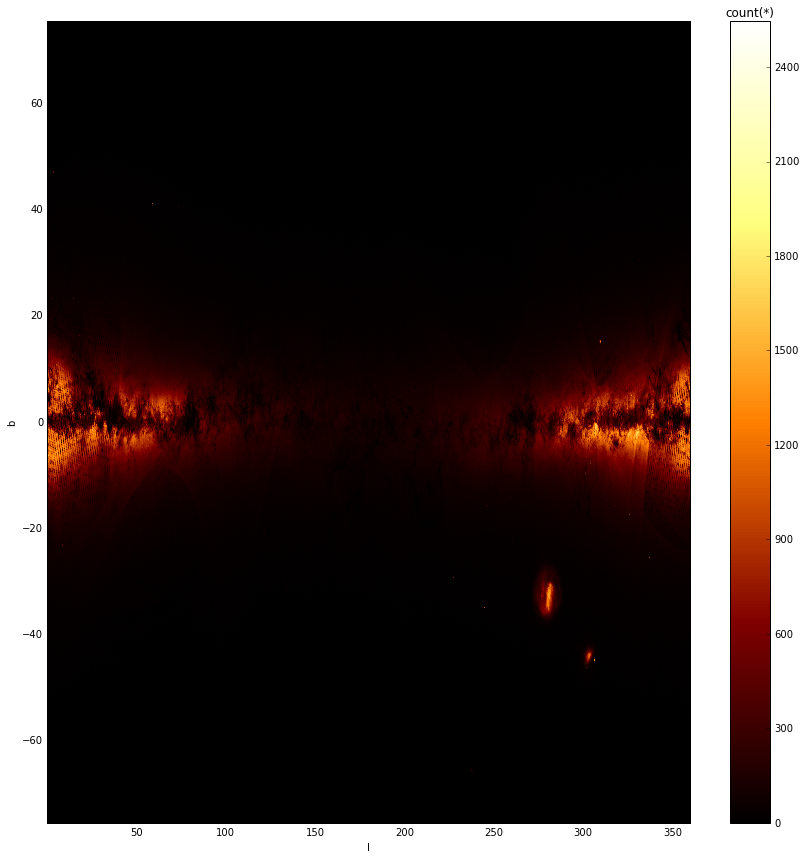

In [124]:
%%time
plt.figure(figsize=(12,12))
gaia.plot("l", "b", shape=1024*4)
plt.savefig("/Users/users/breddels/Dropbox/gaia/gaia-dr1-flat.pdf")

In [125]:
gaia.plot_bq("l", "b")

/Users/users/breddels/src/vaex/vaex/dataset.py:953: RuntimeWarning: divide by zero encountered in log
  data = f(grid)
